In [1]:
#SentDex is a GOD

import tensorflow as tf

mnist = tf.keras.datasets.mnist   #28*28 images of 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add (tf.keras.layers.Flatten()) # input layer; flatten is used here because tensor
model.add (tf.keras.layers.Dense (128, activation = tf.nn.relu)) #1st hidden layer with 128 neurons
model.add (tf.keras.layers.Dense (128, activation = tf.nn.relu)) #2nd hidden layer with 128 neurons
model.add (tf.keras.layers.Dense (10, activation = tf.nn.softmax)) #Output layer with no. of classes and softmax is used for prob. dist.

model.compile(optimizer ='adam',
             loss ='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train,y_train, epochs = 3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2624 - acc: 0.9234
Epoch 2/3
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1063 - acc: 0.9674
Epoch 3/3
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0723 - acc: 0.9776


In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

print(x_train[0])

<Figure size 640x480 with 1 Axes>

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.1001 - acc: 0.9709
0.10008125998135656 0.9709


In [4]:
model.save('epic_num_reader.model')

new_model = tf.keras.models.load_model('epic_num_reader.model')

In [5]:
predictions = new_model.predict(x_test)
print(predictions)

[[4.3892665e-10 8.1365590e-09 3.0336298e-07 ... 9.9999547e-01
  2.5600264e-10 6.2937090e-07]
 [2.8208997e-09 6.2357234e-05 9.9993014e-01 ... 3.0589815e-09
  1.1160303e-06 3.1238379e-10]
 [1.7681471e-07 9.9941742e-01 2.4091332e-05 ... 4.5667705e-04
  6.7115878e-05 5.4843590e-06]
 ...
 [1.5830123e-09 4.2799297e-07 3.1447269e-09 ... 1.1670743e-05
  9.9298191e-08 8.0421836e-05]
 [4.7584845e-07 1.7360514e-07 1.4683431e-07 ... 7.1170024e-07
  1.2858347e-02 7.3574824e-08]
 [1.1275664e-05 3.7155704e-07 7.0367837e-06 ... 3.0104916e-10
  2.9897359e-07 1.3631953e-07]]


In [6]:
import numpy as np
print(np.argmax(predictions[3]))

0


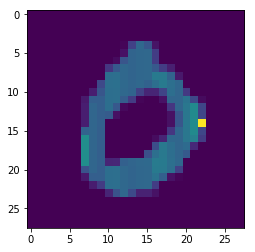

In [7]:
plt.imshow(x_test[3])
plt.show()